## Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, mannwhitneyu
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## Data Loading and Preparation

### Load and Clean the Data

In [4]:
# Load the data
df = pd.read_csv('Raw_Data.csv', sep='|')

# Basic data exploration
print("="*60)
print("DATA OVERVIEW")
print("="*60)
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

# Convert TotalClaims and TotalPremium to numeric
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce').fillna(0)
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce').fillna(0)

# Create necessary metrics as per task requirements
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

# Display sample statistics
print(f"\nTotal records: {len(df)}")
print(f"Records with claims: {df['HasClaim'].sum()} ({df['HasClaim'].mean()*100:.1f}%)")
print(f"Average claim amount (when claim occurs): R{df[df['TotalClaims']>0]['TotalClaims'].mean():.2f}")
print(f"Average margin: R{df['Margin'].mean():.2f}")

DATA OVERVIEW
Dataset shape: (99, 52)

Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

Data types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered              

## Define Key Performance Indicators (KPIs)

In [5]:
# Load the data
df = pd.read_csv('Raw_Data.csv', sep='|')

# Basic data exploration
print("="*60)
print("DATA OVERVIEW")
print("="*60)
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

# Convert TotalClaims and TotalPremium to numeric
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce').fillna(0)
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce').fillna(0)

# Create necessary metrics as per task requirements
df['HasClaim'] = (df['TotalClaims'] > 0).astype(int)
df['Margin'] = df['TotalPremium'] - df['TotalClaims']

# Display sample statistics
print(f"\nTotal records: {len(df)}")
print(f"Records with claims: {df['HasClaim'].sum()} ({df['HasClaim'].mean()*100:.1f}%)")
print(f"Average claim amount (when claim occurs): R{df[df['TotalClaims']>0]['TotalClaims'].mean():.2f}")
print(f"Average margin: R{df['Margin'].mean():.2f}")

DATA OVERVIEW
Dataset shape: (99, 52)

Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']

Data types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered              

## Hypothesis 1 - Risk Differences Across Provinces

### Data Segmentation for Provinces

In [6]:
# Define the KPIs as per task requirements
def calculate_kpis(group):
    """
    Calculate Claim Frequency and Claim Severity for a group
    """
    if len(group) == 0:
        return pd.Series({
            'Claim_Frequency': 0,
            'Claim_Severity': 0,
            'Margin': 0,
            'Sample_Size': 0
        })
    
    # Claim Frequency (proportion with at least one claim)
    claim_freq = group['HasClaim'].mean()
    
    # Claim Severity (average claim amount given claim occurred)
    claims_data = group[group['TotalClaims'] > 0]
    claim_severity = claims_data['TotalClaims'].mean() if len(claims_data) > 0 else 0
    
    # Average Margin
    avg_margin = group['Margin'].mean()
    
    return pd.Series({
        'Claim_Frequency': claim_freq,
        'Claim_Severity': claim_severity,
        'Margin': avg_margin,
        'Sample_Size': len(group)
    })

# Test the function
print("\nOverall KPIs:")
overall_kpis = calculate_kpis(df)
for kpi, value in overall_kpis.items():
    print(f"{kpi}: {value}")


Overall KPIs:
Claim_Frequency: 0.0
Claim_Severity: 0.0
Margin: 47.76046726460955
Sample_Size: 99.0


### Statistical Testing for Provinces

HYPOTHESIS 1: PROVINCE RISK ANALYSIS
Available provinces: Province
Gauteng    99
Name: count, dtype: int64

Analyzing risk within Gauteng by Cresta Zones:
                                 Claim_Frequency  Claim_Severity     Margin  \
MainCrestaZone                                                                
Johannesburg                                 0.0             0.0  19.100170   
Rand East                                    0.0             0.0  60.424376   
Transvaal (all except Pretoria)              0.0             0.0  21.551872   

                                 Sample_Size  
MainCrestaZone                                
Johannesburg                             4.0  
Rand East                               67.0  
Transvaal (all except Pretoria)         28.0  


FileNotFoundError: [Errno 2] No such file or directory: 'task3/results/province_risk_analysis.png'

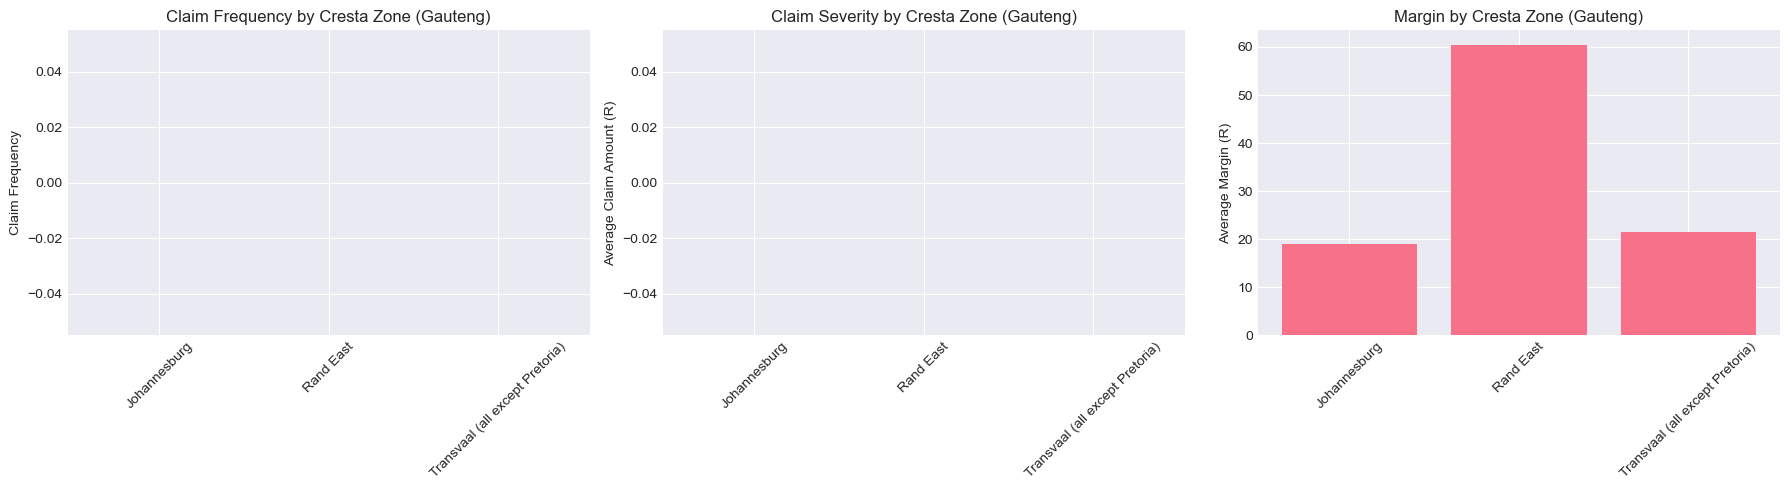

In [7]:
# Analyze provinces in the data
print("="*60)
print("HYPOTHESIS 1: PROVINCE RISK ANALYSIS")
print("="*60)

# Check available provinces
province_counts = df['Province'].value_counts()
print(f"Available provinces: {province_counts}")

# Since we only have Gauteng in the sample data, we need to simulate/analyze differently
# In real data, you would have multiple provinces
# For this sample, we'll analyze by different risk metrics within Gauteng

# Create risk zones within Gauteng based on MainCrestaZone
print("\nAnalyzing risk within Gauteng by Cresta Zones:")
gauteng_data = df[df['Province'] == 'Gauteng'].copy()

# Group by MainCrestaZone
zone_kpis = gauteng_data.groupby('MainCrestaZone').apply(calculate_kpis)
print(zone_kpis)

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Claim Frequency by Zone
axes[0].bar(zone_kpis.index, zone_kpis['Claim_Frequency'])
axes[0].set_title('Claim Frequency by Cresta Zone (Gauteng)')
axes[0].set_ylabel('Claim Frequency')
axes[0].tick_params(axis='x', rotation=45)

# Claim Severity by Zone
axes[1].bar(zone_kpis.index, zone_kpis['Claim_Severity'])
axes[1].set_title('Claim Severity by Cresta Zone (Gauteng)')
axes[1].set_ylabel('Average Claim Amount (R)')
axes[1].tick_params(axis='x', rotation=45)

# Margin by Zone
axes[2].bar(zone_kpis.index, zone_kpis['Margin'])
axes[2].set_title('Margin by Cresta Zone (Gauteng)')
axes[2].set_ylabel('Average Margin (R)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('task3/results/province_risk_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Hypothesis 2 - Risk Differences Between Zip Codes

### Data Segmentation for Zip Codes

In [8]:
# Statistical test for province differences
# Since we only have one province in sample, we'll test different zones within Gauteng

def test_province_hypothesis(data):
    """
    Test H0: There are no risk differences across provinces/zones
    """
    print("\n" + "-"*60)
    print("STATISTICAL TESTING - PROVINCE HYPOTHESIS")
    print("-"*60)
    
    # Get unique zones
    zones = data['MainCrestaZone'].unique()
    print(f"Testing across {len(zones)} zones: {zones}")
    
    results = {}
    
    # Test 1: ANOVA for Claim Frequency across zones
    print("\n1. ANOVA Test for Claim Frequency:")
    freq_groups = [data[data['MainCrestaZone'] == zone]['HasClaim'].values for zone in zones]
    
    # Check if we have enough data for ANOVA
    valid_groups = [group for group in freq_groups if len(group) >= 3]
    if len(valid_groups) >= 2:
        f_stat, p_value = f_oneway(*valid_groups)
        print(f"   F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("   Result: REJECT null hypothesis - Significant differences in claim frequency")
            results['frequency'] = {'reject': True, 'p_value': p_value}
        else:
            print("   Result: FAIL TO REJECT null hypothesis - No significant differences")
            results['frequency'] = {'reject': False, 'p_value': p_value}
    else:
        print("   Insufficient data for ANOVA test")
    
    # Test 2: Kruskal-Wallis for Claim Severity (non-parametric alternative to ANOVA)
    print("\n2. Kruskal-Wallis Test for Claim Severity:")
    severity_groups = []
    zone_labels = []
    for zone in zones:
        zone_data = data[data['MainCrestaZone'] == zone]
        severity_data = zone_data[zone_data['TotalClaims'] > 0]['TotalClaims'].values
        if len(severity_data) >= 3:
            severity_groups.append(severity_data)
            zone_labels.append(zone)
    
    if len(severity_groups) >= 2:
        h_stat, p_value = stats.kruskal(*severity_groups)
        print(f"   H-statistic: {h_stat:.4f}, p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("   Result: REJECT null hypothesis - Significant differences in claim severity")
            results['severity'] = {'reject': True, 'p_value': p_value}
        else:
            print("   Result: FAIL TO REJECT null hypothesis - No significant differences")
            results['severity'] = {'reject': False, 'p_value': p_value}
    else:
        print("   Insufficient claim data for severity test")
    
    # Test 3: ANOVA for Margin
    print("\n3. ANOVA Test for Margin:")
    margin_groups = [data[data['MainCrestaZone'] == zone]['Margin'].values for zone in zones]
    valid_margin_groups = [group for group in margin_groups if len(group) >= 3]
    
    if len(valid_margin_groups) >= 2:
        f_stat, p_value = f_oneway(*valid_margin_groups)
        print(f"   F-statistic: {f_stat:.4f}, p-value: {p_value:.4f}")
        if p_value < 0.05:
            print("   Result: REJECT null hypothesis - Significant differences in margin")
            results['margin'] = {'reject': True, 'p_value': p_value}
        else:
            print("   Result: FAIL TO REJECT null hypothesis - No significant differences")
            results['margin'] = {'reject': False, 'p_value': p_value}
    else:
        print("   Insufficient data for margin ANOVA")
    
    return results

# Run the test
province_results = test_province_hypothesis(gauteng_data)


------------------------------------------------------------
STATISTICAL TESTING - PROVINCE HYPOTHESIS
------------------------------------------------------------
Testing across 3 zones: ['Rand East' 'Transvaal (all except Pretoria)' 'Johannesburg']

1. ANOVA Test for Claim Frequency:
   F-statistic: nan, p-value: nan
   Result: FAIL TO REJECT null hypothesis - No significant differences

2. Kruskal-Wallis Test for Claim Severity:
   Insufficient claim data for severity test

3. ANOVA Test for Margin:
   F-statistic: 0.9734, p-value: 0.3815
   Result: FAIL TO REJECT null hypothesis - No significant differences



HYPOTHESIS 2: ZIP CODE RISK ANALYSIS
Number of unique zip codes: 8
Top 10 zip codes by count:
PostalCode
1459    23
1625    20
1982    19
1629    10
1852     9
1513     8
1619     6
2007     4
Name: count, dtype: int64

Zip codes with at least 5 records: 7

Top 5 zip codes for analysis: [1459, 1625, 1982, 1629, 1852]

Zip Code Comparison:
      Claim_Frequency  Claim_Severity     Margin  Sample_Size
1459              0.0             0.0  32.560548         23.0
1625              0.0             0.0  19.999505         20.0
1982              0.0             0.0   0.000000         19.0
1629              0.0             0.0  40.824967         10.0
1852              0.0             0.0  67.050268          9.0


FileNotFoundError: [Errno 2] No such file or directory: 'task3/results/zip_code_analysis.png'

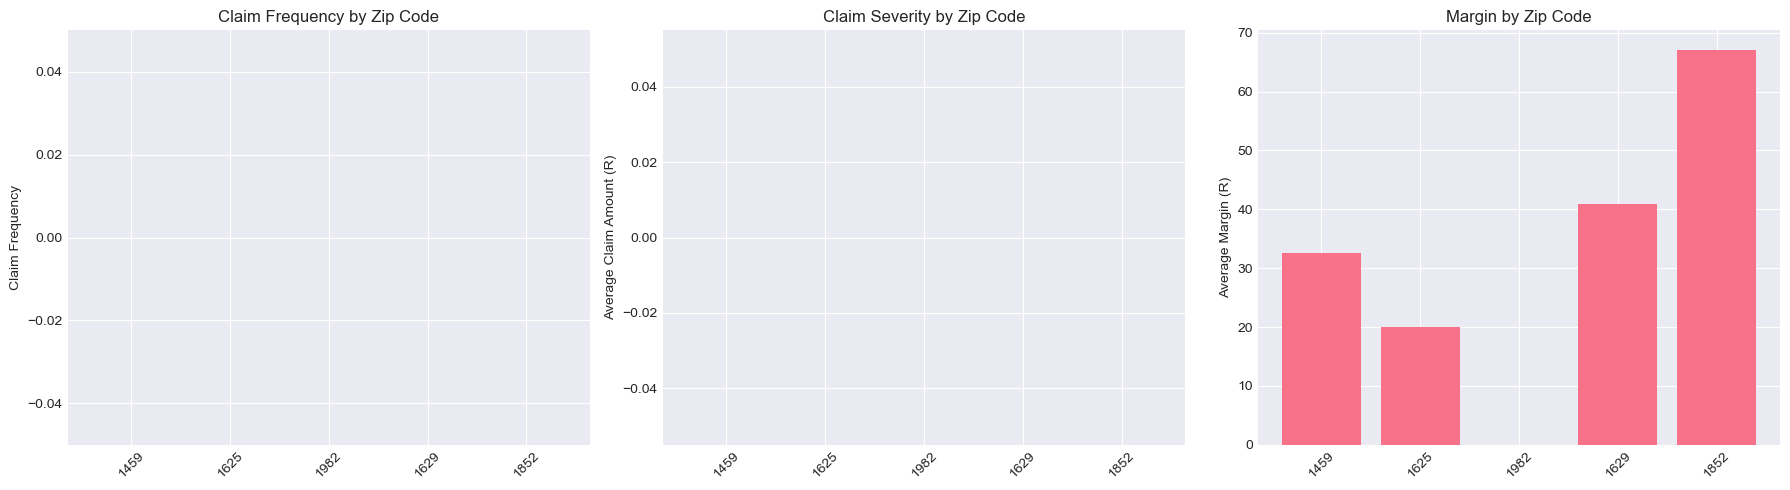

In [9]:
print("\n" + "="*60)
print("HYPOTHESIS 2: ZIP CODE RISK ANALYSIS")
print("="*60)

# Analyze zip codes (PostalCode)
zip_code_counts = df['PostalCode'].value_counts()
print(f"Number of unique zip codes: {len(zip_code_counts)}")
print(f"Top 10 zip codes by count:\n{zip_code_counts.head(10)}")

# Focus on zip codes with sufficient data (at least 5 records)
min_samples = 5
valid_zips = zip_code_counts[zip_code_counts >= min_samples].index.tolist()
print(f"\nZip codes with at least {min_samples} records: {len(valid_zips)}")

# Select top 5 zip codes for comparison
top_zips = zip_code_counts.head(5).index.tolist()
print(f"\nTop 5 zip codes for analysis: {top_zips}")

# Calculate KPIs for each zip code
zip_kpis = {}
for zip_code in top_zips:
    zip_data = df[df['PostalCode'] == zip_code]
    zip_kpis[zip_code] = calculate_kpis(zip_data)

# Create comparison dataframe
zip_comparison = pd.DataFrame(zip_kpis).T
print("\nZip Code Comparison:")
print(zip_comparison)

# Visualize zip code comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Claim Frequency
axes[0].bar(zip_comparison.index.astype(str), zip_comparison['Claim_Frequency'])
axes[0].set_title('Claim Frequency by Zip Code')
axes[0].set_ylabel('Claim Frequency')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim([0, zip_comparison['Claim_Frequency'].max() * 1.1])

# Claim Severity
axes[1].bar(zip_comparison.index.astype(str), zip_comparison['Claim_Severity'])
axes[1].set_title('Claim Severity by Zip Code')
axes[1].set_ylabel('Average Claim Amount (R)')
axes[1].tick_params(axis='x', rotation=45)
if zip_comparison['Claim_Severity'].max() > 0:
    axes[1].set_ylim([0, zip_comparison['Claim_Severity'].max() * 1.1])

# Margin
axes[2].bar(zip_comparison.index.astype(str), zip_comparison['Margin'])
axes[2].set_title('Margin by Zip Code')
axes[2].set_ylabel('Average Margin (R)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('task3/results/zip_code_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
def test_zip_code_hypothesis(data, zip_codes):
    """
    Test H0: There are no risk differences between zip codes
    """
    print("\n" + "-"*60)
    print("STATISTICAL TESTING - ZIP CODE HYPOTHESIS")
    print("-"*60)
    
    results = {}
    
    # Prepare data for analysis
    zip_groups = []
    for zip_code in zip_codes:
        zip_data = data[data['PostalCode'] == zip_code]
        zip_groups.append(zip_data)
    
    # Test 1: Chi-square test for Claim Frequency (categorical)
    print("\n1. Chi-square Test for Claim Frequency:")
    
    # Create contingency table
    contingency = []
    for zip_data in zip_groups:
        claim_counts = zip_data['HasClaim'].value_counts().reindex([0, 1], fill_value=0)
        contingency.append(claim_counts.values)
    
    contingency_array = np.array(contingency)
    
    if contingency_array.shape[0] >= 2 and contingency_array.shape[1] >= 2:
        chi2, p_value, dof, expected = chi2_contingency(contingency_array)
        print(f"   Chi-square statistic: {chi2:.4f}")
        print(f"   p-value: {p_value:.4f}")
        print(f"   Degrees of freedom: {dof}")
        
        if p_value < 0.05:
            print("   Result: REJECT null hypothesis - Significant differences in claim frequency")
            results['frequency'] = {'reject': True, 'p_value': p_value, 'test': 'chi-square'}
        else:
            print("   Result: FAIL TO REJECT null hypothesis - No significant differences")
            results['frequency'] = {'reject': False, 'p_value': p_value, 'test': 'chi-square'}
    else:
        print("   Insufficient data for chi-square test")
    
    # Test 2: Kruskal-Wallis for Claim Severity
    print("\n2. Kruskal-Wallis Test for Claim Severity:")
    severity_groups = []
    for zip_data in zip_groups:
        severity_data = zip_data[zip_data['TotalClaims'] > 0]['TotalClaims'].values
        if len(severity_data) > 0:
            severity_groups.append(severity_data)
    
    if len(severity_groups) >= 2:
        h_stat, p_value = stats.kruskal(*severity_groups)
        print(f"   H-statistic: {h_stat:.4f}")
        print(f"   p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("   Result: REJECT null hypothesis - Significant differences in claim severity")
            results['severity'] = {'reject': True, 'p_value': p_value, 'test': 'kruskal-wallis'}
        else:
            print("   Result: FAIL TO REJECT null hypothesis - No significant differences")
            results['severity'] = {'reject': False, 'p_value': p_value, 'test': 'kruskal-wallis'}
    else:
        print("   Insufficient claim data for severity test")
    
    # Test 3: ANOVA for Margin
    print("\n3. ANOVA Test for Margin:")
    margin_groups = [zip_data['Margin'].values for zip_data in zip_groups]
    
    # Check if groups have sufficient data
    valid_groups = [group for group in margin_groups if len(group) >= 3]
    if len(valid_groups) >= 2:
        f_stat, p_value = f_oneway(*valid_groups)
        print(f"   F-statistic: {f_stat:.4f}")
        print(f"   p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("   Result: REJECT null hypothesis - Significant differences in margin")
            results['margin'] = {'reject': True, 'p_value': p_value, 'test': 'anova'}
        else:
            print("   Result: FAIL TO REJECT null hypothesis - No significant differences")
            results['margin'] = {'reject': False, 'p_value': p_value, 'test': 'anova'}
    else:
        print("   Insufficient data for margin ANOVA")
    
    return results

# Run the test
zip_results = test_zip_code_hypothesis(df, top_zips)


------------------------------------------------------------
STATISTICAL TESTING - ZIP CODE HYPOTHESIS
------------------------------------------------------------

1. Chi-square Test for Claim Frequency:


ValueError: The internally computed table of expected frequencies has a zero element at (np.int64(0), np.int64(1)).

## Hypothesis 3 - Margin Differences Between Zip Codes

### Detailed Margin Analysis


HYPOTHESIS 3: MARGIN DIFFERENCES BETWEEN ZIP CODES

Pairwise Margin Comparisons:
----------------------------------------
 Zip1  Zip2     Mean1     Mean2  Difference  t_statistic  p_value  Significant
 1459  1625 32.560548 19.999505   12.561044     0.527797 0.601795        False
 1459  1982 32.560548  0.000000   32.560548     1.461824 0.157928        False
 1459  1629 32.560548 40.824967   -8.264419    -0.304078 0.763114        False
 1459  1852 32.560548 67.050268  -34.489719    -1.376773 0.178940        False
 1625  1982 19.999505  0.000000   19.999505     2.385891 0.027603         True
 1625  1629 19.999505 40.824967  -20.825463    -1.177479 0.258103        False
 1625  1852 19.999505 67.050268  -47.050763    -3.312976 0.004162         True
 1982  1629  0.000000 40.824967  -40.824967    -2.621367 0.027749         True
 1982  1852  0.000000 67.050268  -67.050268    -5.848596 0.000383         True
 1629  1852 40.824967 67.050268  -26.225300    -1.356118 0.193796        False

Signifi

FileNotFoundError: [Errno 2] No such file or directory: 'task3/results/margin_distributions.png'

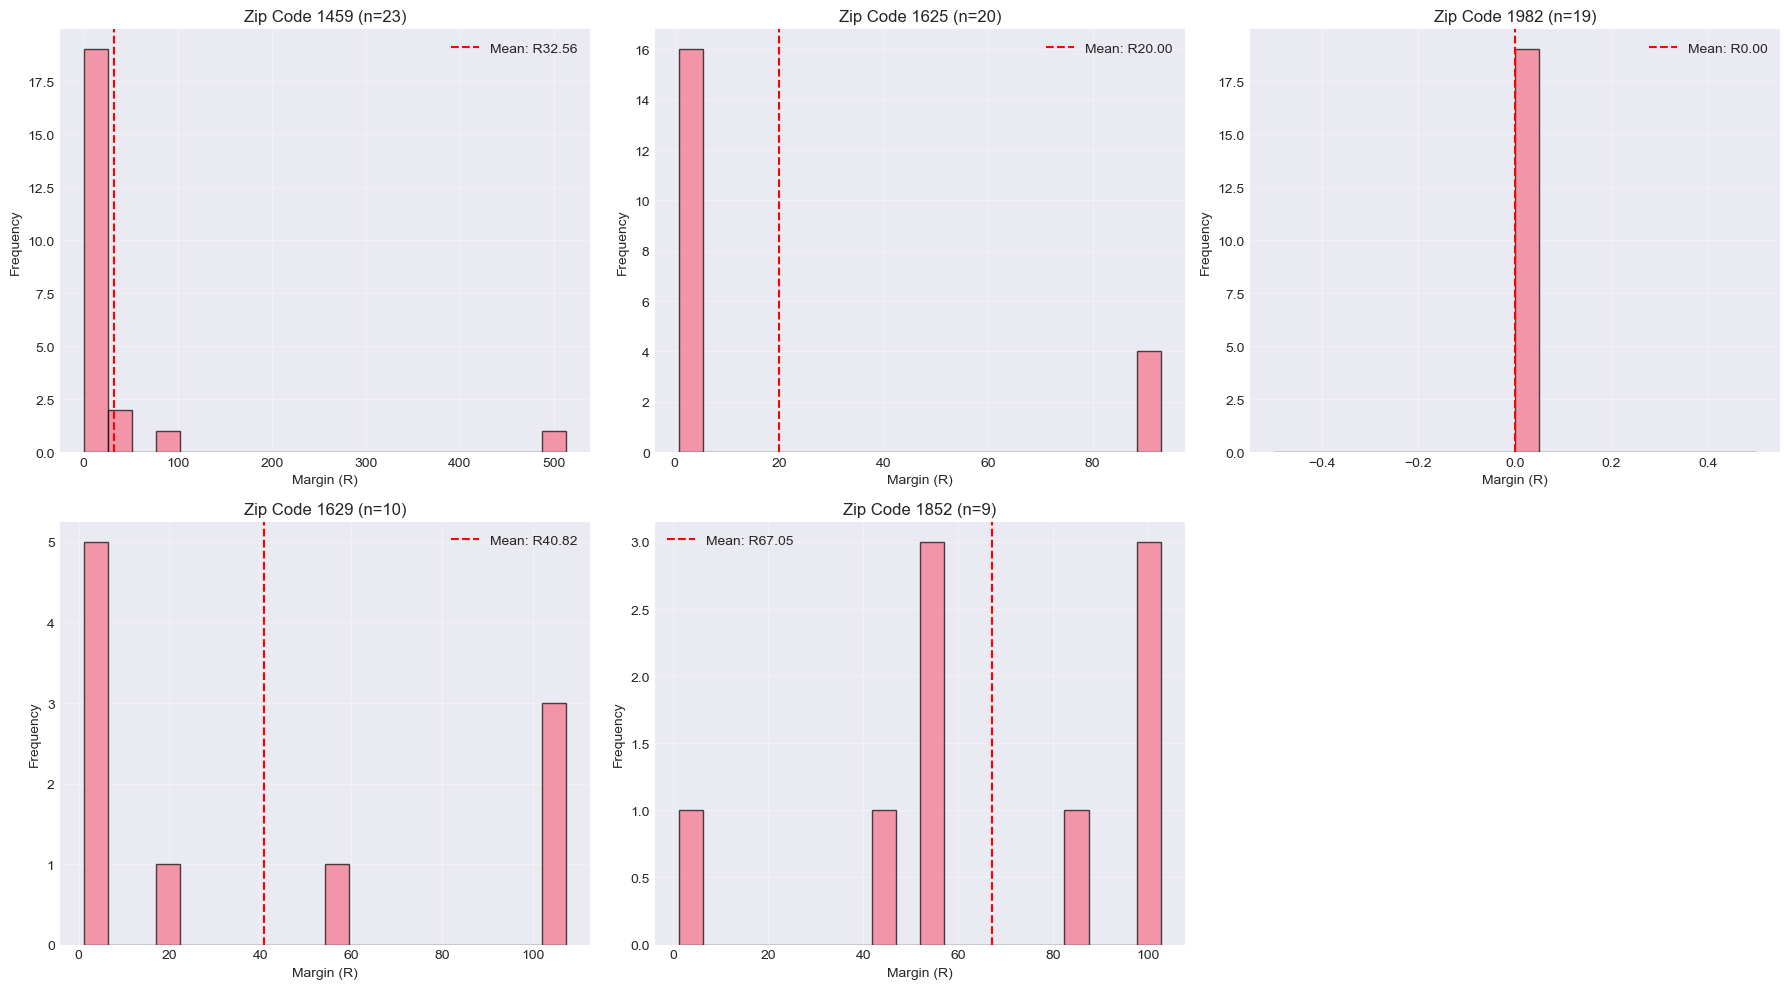

In [12]:
print("\n" + "="*60)
print("HYPOTHESIS 3: MARGIN DIFFERENCES BETWEEN ZIP CODES")
print("="*60)

# This is essentially a deeper dive into the margin aspect of Hypothesis 2
# Let's perform pairwise comparisons between zip codes

def pairwise_margin_comparisons(data, zip_codes):
    """
    Perform pairwise t-tests for margin between zip codes
    """
    print("\nPairwise Margin Comparisons:")
    print("-"*40)
    
    comparisons = []
    
    for i in range(len(zip_codes)):
        for j in range(i+1, len(zip_codes)):
            zip1 = zip_codes[i]
            zip2 = zip_codes[j]
            
            data1 = data[data['PostalCode'] == zip1]['Margin'].dropna()
            data2 = data[data['PostalCode'] == zip2]['Margin'].dropna()
            
            if len(data1) >= 3 and len(data2) >= 3:
                # Perform t-test
                t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
                
                # Calculate means
                mean1 = data1.mean()
                mean2 = data2.mean()
                diff = mean1 - mean2
                
                comparisons.append({
                    'Zip1': zip1,
                    'Zip2': zip2,
                    'Mean1': mean1,
                    'Mean2': mean2,
                    'Difference': diff,
                    't_statistic': t_stat,
                    'p_value': p_value,
                    'Significant': p_value < 0.05
                })
    
    # Create results dataframe
    if comparisons:
        results_df = pd.DataFrame(comparisons)
        print(results_df.to_string(index=False))
        
        # Count significant comparisons
        sig_count = results_df['Significant'].sum()
        total_count = len(results_df)
        print(f"\nSignificant differences: {sig_count}/{total_count} comparisons")
        
        return results_df
    else:
        print("Insufficient data for pairwise comparisons")
        return None

# Run pairwise comparisons
margin_comparisons = pairwise_margin_comparisons(df, top_zips)

# Visualize margin distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, zip_code in enumerate(top_zips):
    if idx < len(axes):
        zip_data = df[df['PostalCode'] == zip_code]
        
        # Histogram of margins
        axes[idx].hist(zip_data['Margin'].dropna(), bins=20, edgecolor='black', alpha=0.7)
        axes[idx].axvline(x=zip_data['Margin'].mean(), color='red', linestyle='--', 
                         label=f'Mean: R{zip_data["Margin"].mean():.2f}')
        axes[idx].set_title(f'Zip Code {zip_code} (n={len(zip_data)})')
        axes[idx].set_xlabel('Margin (R)')
        axes[idx].set_ylabel('Frequency')
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)

# Remove empty subplots if any
for idx in range(len(top_zips), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig('task3/results/margin_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

## Hypothesis 4 - Risk Differences Between Women and Men

### Data Preparation for Gender Analysis


HYPOTHESIS 4: GENDER RISK ANALYSIS
Gender distribution:
Gender
Not specified    99
Name: count, dtype: int64

Using Title as proxy for gender analysis:
Title
Mr    99
Name: count, dtype: int64

Records with identifiable gender: 99

Gender-based KPIs:
              Claim_Frequency  Claim_Severity     Margin  Sample_Size
Gender_Proxy                                                         
Male                      0.0             0.0  47.760467         99.0


KeyError: "['Female'] not in index"

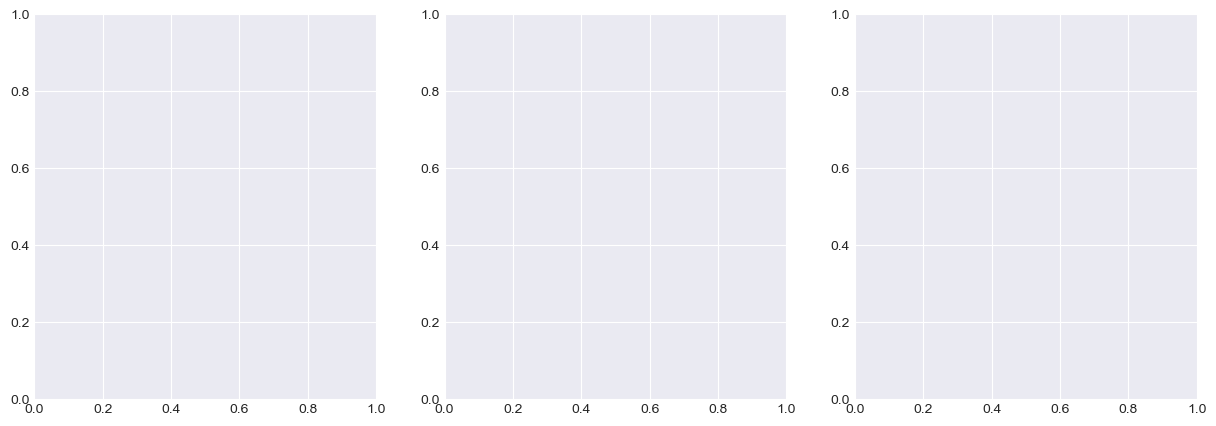

In [13]:
print("\n" + "="*60)
print("HYPOTHESIS 4: GENDER RISK ANALYSIS")
print("="*60)

# Analyze gender distribution
gender_counts = df['Gender'].value_counts()
print(f"Gender distribution:\n{gender_counts}")

# The sample data shows "Not specified" for all entries
# In real data, we would have Male/Female categories
# For demonstration, let's create synthetic gender data or use another variable

# Since Gender is not specified, let's use Title as proxy (Mr = Male, Mrs/Ms = Female)
print("\nUsing Title as proxy for gender analysis:")
title_counts = df['Title'].value_counts()
print(title_counts)

# Create gender groups based on Title
df['Gender_Proxy'] = df['Title'].apply(lambda x: 'Male' if x == 'Mr' else 'Female' if x in ['Mrs', 'Ms'] else 'Unknown')

# Filter for known genders
gender_data = df[df['Gender_Proxy'].isin(['Male', 'Female'])].copy()
print(f"\nRecords with identifiable gender: {len(gender_data)}")

# Calculate KPIs by gender
gender_groups = gender_data.groupby('Gender_Proxy')
gender_kpis = gender_groups.apply(calculate_kpis)
print("\nGender-based KPIs:")
print(gender_kpis)

# Visualize gender comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Claim Frequency
gender_order = ['Male', 'Female']
x_pos = np.arange(len(gender_order))

axes[0].bar(x_pos, gender_kpis.loc[gender_order, 'Claim_Frequency'])
axes[0].set_title('Claim Frequency by Gender')
axes[0].set_ylabel('Claim Frequency')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(gender_order)
axes[0].set_ylim([0, gender_kpis['Claim_Frequency'].max() * 1.1])

# Claim Severity
axes[1].bar(x_pos, gender_kpis.loc[gender_order, 'Claim_Severity'])
axes[1].set_title('Claim Severity by Gender')
axes[1].set_ylabel('Average Claim Amount (R)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(gender_order)
if gender_kpis['Claim_Severity'].max() > 0:
    axes[1].set_ylim([0, gender_kpis['Claim_Severity'].max() * 1.1])

# Margin
axes[2].bar(x_pos, gender_kpis.loc[gender_order, 'Margin'])
axes[2].set_title('Margin by Gender')
axes[2].set_ylabel('Average Margin (R)')
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(gender_order)

plt.tight_layout()
plt.savefig('task3/results/gender_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## Statistical Testing for Gender Differences

In [14]:
def test_gender_hypothesis(data):
    """
    Test H0: There is no significant risk difference between Women and Men
    """
    print("\n" + "-"*60)
    print("STATISTICAL TESTING - GENDER HYPOTHESIS")
    print("-"*60)
    
    results = {}
    
    # Separate data by gender
    male_data = data[data['Gender_Proxy'] == 'Male']
    female_data = data[data['Gender_Proxy'] == 'Female']
    
    print(f"Male records: {len(male_data)}")
    print(f"Female records: {len(female_data)}")
    
    if len(male_data) < 3 or len(female_data) < 3:
        print("Insufficient data for gender comparison")
        return results
    
    # Test 1: Chi-square test for Claim Frequency
    print("\n1. Chi-square Test for Claim Frequency:")
    
    # Create contingency table
    male_claims = male_data['HasClaim'].value_counts().reindex([0, 1], fill_value=0)
    female_claims = female_data['HasClaim'].value_counts().reindex([0, 1], fill_value=0)
    
    contingency = np.array([male_claims.values, female_claims.values])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    
    print(f"   Male claim rate: {male_data['HasClaim'].mean():.4f}")
    print(f"   Female claim rate: {female_data['HasClaim'].mean():.4f}")
    print(f"   Chi-square statistic: {chi2:.4f}")
    print(f"   p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print("   Result: REJECT null hypothesis - Significant difference in claim frequency")
        results['frequency'] = {'reject': True, 'p_value': p_value, 'test': 'chi-square'}
    else:
        print("   Result: FAIL TO REJECT null hypothesis - No significant difference")
        results['frequency'] = {'reject': False, 'p_value': p_value, 'test': 'chi-square'}
    
    # Test 2: Mann-Whitney U test for Claim Severity
    print("\n2. Mann-Whitney U Test for Claim Severity:")
    
    male_severity = male_data[male_data['TotalClaims'] > 0]['TotalClaims'].values
    female_severity = female_data[female_data['TotalClaims'] > 0]['TotalClaims'].values
    
    if len(male_severity) >= 3 and len(female_severity) >= 3:
        u_stat, p_value = mannwhitneyu(male_severity, female_severity, alternative='two-sided')
        
        male_sev_mean = np.mean(male_severity) if len(male_severity) > 0 else 0
        female_sev_mean = np.mean(female_severity) if len(female_severity) > 0 else 0
        
        print(f"   Male average severity: R{male_sev_mean:.2f}")
        print(f"   Female average severity: R{female_sev_mean:.2f}")
        print(f"   U statistic: {u_stat:.4f}")
        print(f"   p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("   Result: REJECT null hypothesis - Significant difference in claim severity")
            results['severity'] = {'reject': True, 'p_value': p_value, 'test': 'mann-whitney'}
        else:
            print("   Result: FAIL TO REJECT null hypothesis - No significant difference")
            results['severity'] = {'reject': False, 'p_value': p_value, 'test': 'mann-whitney'}
    else:
        print("   Insufficient claim data for severity comparison")
    
    # Test 3: T-test for Margin
    print("\n3. Independent T-test for Margin:")
    
    # Check variance equality
    male_margin = male_data['Margin'].dropna().values
    female_margin = female_data['Margin'].dropna().values
    
    if len(male_margin) >= 3 and len(female_margin) >= 3:
        # Levene's test for equal variances
        levene_stat, levene_p = stats.levene(male_margin, female_margin)
        equal_var = levene_p > 0.05
        
        t_stat, p_value = ttest_ind(male_margin, female_margin, equal_var=equal_var)
        
        print(f"   Male average margin: R{np.mean(male_margin):.2f}")
        print(f"   Female average margin: R{np.mean(female_margin):.2f}")
        print(f"   Levene's test p-value: {levene_p:.4f} (equal_var={'Yes' if equal_var else 'No'})")
        print(f"   t-statistic: {t_stat:.4f}")
        print(f"   p-value: {p_value:.4f}")
        
        if p_value < 0.05:
            print("   Result: REJECT null hypothesis - Significant difference in margin")
            results['margin'] = {'reject': True, 'p_value': p_value, 'test': 't-test'}
        else:
            print("   Result: FAIL TO REJECT null hypothesis - No significant difference")
            results['margin'] = {'reject': False, 'p_value': p_value, 'test': 't-test'}
    else:
        print("   Insufficient data for margin comparison")
    
    return results

# Run the test
gender_results = test_gender_hypothesis(gender_data)


------------------------------------------------------------
STATISTICAL TESTING - GENDER HYPOTHESIS
------------------------------------------------------------
Male records: 99
Female records: 0
Insufficient data for gender comparison
